# Abalone age
<p>
전복의 나이 예측 문제
</p>

## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-pastel')
import seaborn as sns

SEED = 42

## 데이터 불러오기

In [2]:
col_name = ['sex','length','diameter','height','whole_weight','shucked_weight','viscera_weight',
            'shell_weight','rings']
abalone = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SKT FLY AI/Practice/abalone.data',
                      names=col_name)
abalone.head(3)

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9




*   sex : 성별
*   length : 길이
*   diameter : 직경
*   height : 높이
*   whole_weight : 전체 중량
*   shucked_weight : 고기의 무게
*   viscera_weight : 장의 무게
*   shell_weight : 껍질 무게
*   Rings : 나이





In [3]:
df = abalone.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
whole_weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
shucked_weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
viscera_weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
shell_weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


In [5]:
df.isna().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

In [6]:
df.duplicated().sum()

0

### 명목형 데이터

In [7]:
df['sex'].value_counts() # I = 유아

sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

### 연속형 데이터

In [8]:
df_num = df.select_dtypes(include=['number'])
df_num.columns

Index(['length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'rings'],
      dtype='object')

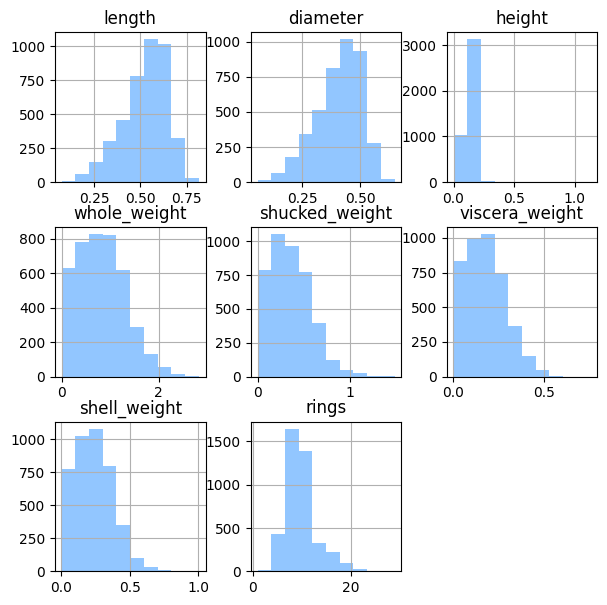

In [9]:
df_num.hist(figsize=(7,7))
plt.show()

<Axes: xlabel='height', ylabel='Count'>

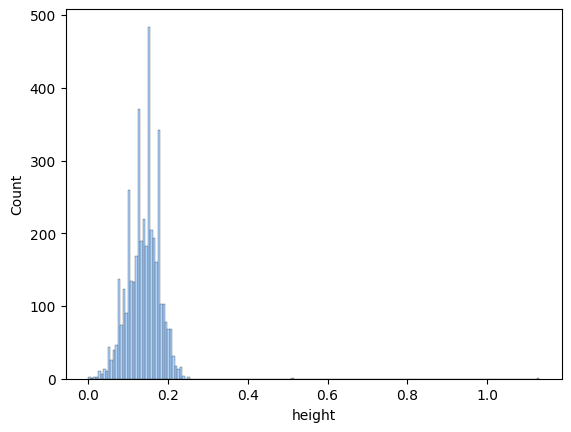

In [10]:
sns.histplot(df_num['height'])

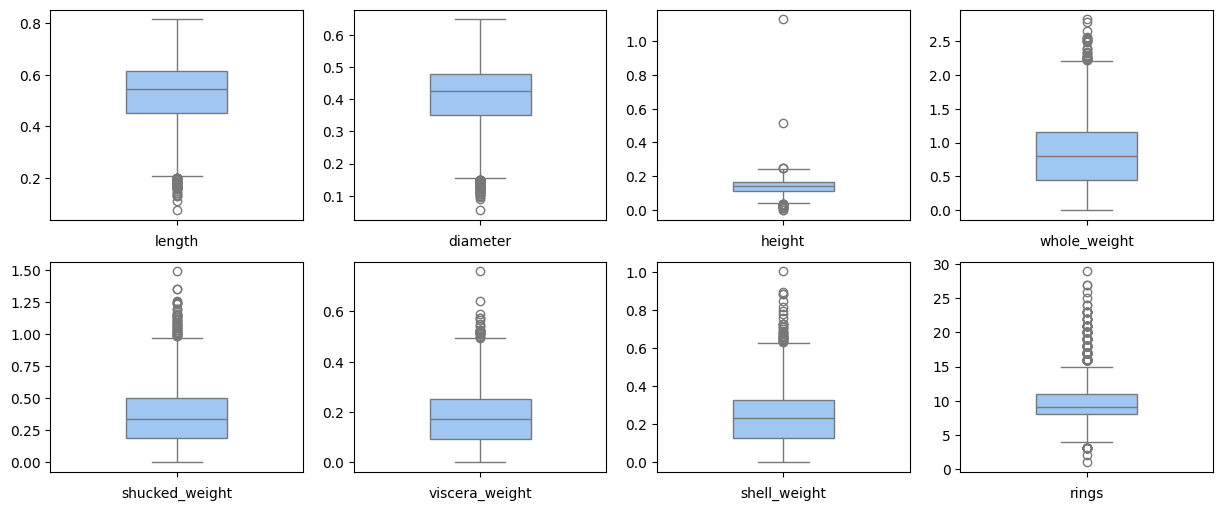

In [11]:
fig, ax = plt.subplots(2,4,figsize=(15,6))
ax = ax.flatten()

for i,col in enumerate(df_num.columns):
    sns.boxplot(df_num[col],ax=ax[i],width=0.4)
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('')

## 데이터 분할

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['rings'],axis=1),df['rings'], test_size=0.2, random_state=SEED)

In [13]:
X_train

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
4038,I,0.550,0.445,0.125,0.6720,0.2880,0.1365,0.210
1272,I,0.475,0.355,0.100,0.5035,0.2535,0.0910,0.140
3384,F,0.305,0.225,0.070,0.1485,0.0585,0.0335,0.045
3160,I,0.275,0.200,0.065,0.1165,0.0565,0.0130,0.035
3894,M,0.495,0.380,0.135,0.6295,0.2630,0.1425,0.215
...,...,...,...,...,...,...,...,...
3444,F,0.490,0.400,0.115,0.5690,0.2560,0.1325,0.145
466,F,0.670,0.550,0.190,1.3905,0.5425,0.3035,0.400
3092,M,0.510,0.395,0.125,0.5805,0.2440,0.1335,0.188
3772,M,0.575,0.465,0.120,1.0535,0.5160,0.2185,0.235


## 데이터 전처리

### OneHotEncoding

In [14]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
train_sex = ohe.fit_transform(X_train[['sex']])
temp = pd.DataFrame(train_sex,columns=ohe.categories_[0],index=X_train.index)
X_train_oh = pd.concat([X_train.drop(['sex'],axis=1),temp],axis=1)

### RobustScaler

In [15]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
X_train_oh_s = rs.fit_transform(X_train_oh)

In [16]:
X_train_oh_s.shape, y_train.shape

((3341, 10), (3341,))

## 모델 학습

In [17]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=SEED)
rf.fit(X_train_oh_s,y_train)

RandomForestRegressor(random_state=42)

## 테스트 데이터 전처리 및 예측, 평가

In [19]:
train_sex = ohe.fit_transform(X_test[['sex']])
temp = pd.DataFrame(train_sex,columns=ohe.categories_[0],index=X_test.index)
X_test_oh = pd.concat([X_test.drop(['sex'],axis=1),temp],axis=1)

In [20]:
X_test_oh_s = rs.transform(X_test_oh)

In [21]:
y_pred = rf.predict(X_test_oh_s)

### 모델 평가

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MAE : ',mean_absolute_error(y_test,y_pred))
print('MSE : ',mean_squared_error(y_test,y_pred))

MAE :  1.5889832535885167
MSE :  5.105372607655503


<ipython-input-30-4d19b178f685>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],'k--',lw=3,color='b')


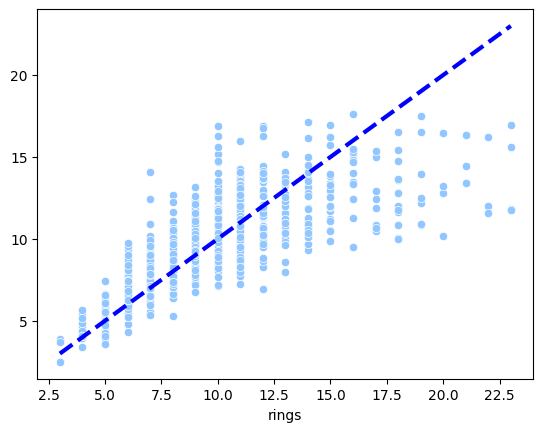

In [30]:
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],'k--',lw=3,color='b')
plt.show()